# **PART-A**

## __1. a)__ What is Dimensionality Reduction ?
___Ans.___ In a dataset, the number of variables or features present is known as Dimensions.

If data is represented using rows and columns, such as in a spreadsheet, then the ___input variables___ are the columns that are fed as input to a model to predict the ___target variable___. Input variables are also called ___features___.

When the dataset is huge, there will be a lot of variables and features, thus it will have higher dimensions. 

When we deal with high dimnesional data, then its more chalanging to do predictive modeling on a model,It's also hard for us to visualize the data and it also affects the output of Machine Learning Algorithm as there might be some grabage, irrelevant, missing or repetative data, Which is also known as "_Curse of Dimensionality_". This increases the cost of the storage of data and uses a huge amount of resources.

Dimensionality reduction may can be defined as the process or technique to remove the '_Uninformative information_' while retaining the informational data. In laymen words, it's a process of removing input variable from the database such that the removal of the variables does not change the database output by a huge amount.

## __1. b)__ Why is dimensionality reduction required?

___Ans.___ Dimensionality reduction is required to remove the '_Uninformative information_' from the data which in return will do the following things:
- It will reduce the size of the database as dimension of the database is reduced.
- Less dimensions lead to less computation and training time
- Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful.
- It's hard for us to visualize the data if it have higher dimensionality so dimensionality reduction helps us to visualize the data.
- After dimensionality reduction, the output of the machine learning model will be more accurate when compared to uncleaned high dimensional dataset.



## Missing Value Ratio
When a dataset is given to us which have huge dimenisons, there is a chance that some values are missing in the dataset. 

Here question arrises, If the dataset does not have values associated to the variable so chould be impute the variable or drop the variable.

To decide if we want to impute the variavle or drop the variable we calculate the '_Missing Value Ratio_' which will help us to decide we impute or drop the varaiable if the missing value have a threshold of x(say 50%). If the values are more than x then we impute the variable otherwise we drop the variable.

In [ ]:
# import required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# read the data
train=pd.read_csv("fashion-mnist_train.csv")

Let for this dataset:

1. **label** is our dependent variable, and
2. all other columns are our independent variables.

In [ ]:
# checking the percentage of missing values in each variable 
a = train.isnull().sum()/len(train)*100
print(a)
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=50:   #setting the threshold as 20%
        variable.append(variables[i])
print(variables)

label       0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 785, dtype: float64
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


As we see here no value is missing from the dataset so no 'label' is removed from the dataset.

## Low Variance Filter

In our dataset say some variable have same values (say z), if we include that variable then our model would be improved? __NO__ since the variance of that variable will be 0 so it would not be very heplful for us. 

So we calculate the variance of each variable and then compare with others.


In [65]:
train.var()

label          8.250138
pixel1         0.008966
pixel2         0.073447
pixel3         1.494076
pixel4         6.016577
               ...     
pixel780    2038.467256
pixel781     877.039858
pixel782     302.678284
pixel783      87.552700
pixel784       4.519324
Length: 785, dtype: float64

As we can see here 'pixel2' have the almost 0 variance so we create the threshold and will remove those who have less variance then the threshold

In [66]:
numeric = train
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=50:   #setting the threshold as 50%
       variable.append(numeric[i])
print(variable)
print(len(variable))

['pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel92', 'pixel93', 'pixel94', 'pixel95', 'pixel96', 'pixel97', 'pixel98', 'pixel99', 'pixel100', 'pixel101', 'pixel102', 'pixel103', 'pixel104', 'pixel105', 'pixel106', 'pixel107', 'pixel108', 'pixel109', 'pixel110', 'pixel111', 

We see that 785 - 756 = 26 variables are removed.

## High Correlation Filter
High correlation between two variables may can be defined as they have similar trends and are likely to have information similar to each other

This can bring down the performance of some models drastically. We can calculate the correlation between independent numerical variables. 

If corelation coefficeint overcomes the threshold value c1 (say 80%) then we will drop one of the two variable.

Since dropping variable is not ideal so we drop the variable taking ddomain into consideration.

```df.corr()``` gives us the correlation of each variable

In [ ]:
df=train.drop('label', 1) 
df.corr()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,1.000000,0.297899,0.067550,0.046608,0.026630,0.026172,0.012095,0.012218,0.009637,0.000053,-0.001539,-0.001706,-0.003408,-0.004327,-0.004091,-0.004538,-0.003630,0.000359,0.000233,0.003825,0.009263,0.009629,0.013325,0.010738,0.014229,0.020924,0.033467,0.068284,0.174315,0.069358,0.035210,0.019391,0.015975,0.019228,0.015485,0.008701,0.007047,0.001935,0.001935,0.002625,...,-0.000937,-0.000943,0.000916,0.002869,0.005465,0.003384,-0.001032,-0.001892,0.000124,0.008300,0.013673,0.028217,0.079727,0.040084,0.021226,0.000800,-0.000404,-0.002468,0.000229,0.004006,0.003137,0.000512,-0.000009,-0.000972,-0.002624,-0.001192,0.000013,-0.001553,-0.000988,-0.000829,-0.000642,0.004625,0.004605,0.000969,-0.002306,-0.002441,-0.000108,0.008765,0.026389,0.041582
pixel2,0.297899,1.000000,0.575029,0.138710,0.054354,0.033185,0.022763,0.017127,0.016809,0.010904,0.001093,-0.004771,-0.009056,-0.009805,-0.009818,-0.009123,-0.005711,0.000901,0.005705,0.011686,0.012376,0.013169,0.018455,0.018646,0.022279,0.023378,0.056003,0.072982,0.053172,0.250093,0.295474,0.122013,0.062288,0.038411,0.030798,0.023628,0.017484,0.010037,0.002512,-0.002752,...,0.007587,0.007803,0.011101,0.015181,0.019891,0.014801,0.003668,0.002738,0.007653,0.019849,0.026739,0.011891,0.026220,0.069062,0.043791,0.016090,0.011048,0.004598,0.011083,0.019441,0.014417,0.011368,0.007356,0.003313,0.003722,0.005585,0.006584,0.001384,-0.002687,-0.002457,0.000492,0.004857,0.006811,0.002083,-0.004431,-0.002342,0.004273,0.014218,0.021297,0.022162
pixel3,0.067550,0.575029,1.000000,0.387466,0.118135,0.087300,0.060927,0.035920,0.029712,0.021526,0.013910,0.008741,-0.000241,-0.003637,-0.003393,-0.002595,0.003548,0.011294,0.015110,0.022888,0.028651,0.035774,0.046564,0.063943,0.086459,0.088027,0.026804,0.023971,0.011710,0.109548,0.492300,0.257715,0.129912,0.065453,0.049379,0.040335,0.033733,0.024664,0.014226,0.008738,...,0.015436,0.013977,0.016125,0.022081,0.028490,0.018108,0.002189,0.001903,0.006953,0.012469,0.009524,0.006071,0.007811,0.023482,0.022493,0.020237,0.013674,0.008991,0.011040,0.029225,0.028937,0.023584,0.017934,0.010489,0.012451,0.016035,0.016512,0.010369,0.005020,0.005930,0.010131,0.016743,0.018358,0.006171,-0.003825,-0.001501,0.006860,0.013152,0.009946,0.015657
pixel4,0.046608,0.138710,0.387466,1.000000,0.573172,0.325684,0.242954,0.140955,0.085253,0.051090,0.024939,0.015824,0.008635,0.005675,0.006265,0.005179,0.010275,0.019666,0.031051,0.057427,0.090017,0.131338,0.182904,0.236695,0.313833,0.235375,0.045772,0.006049,0.010717,0.035056,0.442038,0.687574,0.430277,0.216119,0.123876,0.082804,0.057410,0.040183,0.024800,0.017502,...,0.012483,0.012839,0.016588,0.026144,0.034462,0.028697,0.021840,0.019190,0.022043,0.012583,-0.000146,0.001631,0.003496,0.007653,0.018884,0.030151,0.024329,0.023178,0.020993,0.032810,0.031504,0.024483,0.015827,0.008769,0.008769,0.014395,0.016365,0.010266,0.002809,0.004791,0.009684,0.018697,0.023373,0.016718,0.009681,0.010095,0.023942,0.012392,0.003075,0.008423
pixel5,0.026630,0.054354,0.118135,0.573172,1.000000,0.692891,0.423577,0.230564,0.136311,0.075599,0.035570,0.020526,0.015787,0.016198,0.017713,0.011653,0.013646,0.025918,0.043240,0.087196,0.151014,0.227373,0.323853,0.355558,0.331787,0.146442,0.040084,0.003427,0.006152,0.026354,0.184695,0.590217,0.682275,0.375071,0.192633,0.121428,0.077064,0.049404,0.028192,

Now we drop the variable after setting the threshold to the trainig dataset

In [ ]:
test = df
correlated_features = set()
correlation_matrix = test.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:      # threshold correlation coefficient
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

test.drop(labels=correlated_features, axis=1, inplace=True)
test.corr()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel38,pixel39,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,...,pixel562,pixel588,pixel589,pixel590,pixel617,pixel618,pixel644,pixel645,pixel646,pixel672,pixel673,pixel674,pixel675,pixel700,pixel701,pixel702,pixel703,pixel727,pixel728,pixel729,pixel730,pixel731,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel777,pixel778,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,1.000000,0.297899,0.067550,0.046608,0.026630,0.026172,0.012095,0.012218,0.009637,0.000053,-0.001539,-0.001706,-0.003408,-0.003630,0.000359,0.000233,0.003825,0.009263,0.009629,0.013325,0.010738,0.014229,0.020924,0.033467,0.068284,0.174315,0.035210,0.019391,0.015975,0.019228,0.015485,0.008701,0.001935,0.001935,0.005473,0.008210,0.008955,0.012127,0.011958,0.011627,...,0.000503,0.000879,0.001737,0.002151,0.002055,0.003333,0.006780,0.004121,0.004498,0.009652,0.008758,0.006720,0.005369,0.011949,0.012153,0.010140,0.007456,0.008924,0.017645,0.018746,0.015649,0.011150,0.013673,0.028217,0.079727,0.040084,0.021226,0.000800,-0.000404,-0.002468,0.000229,0.004006,0.003137,0.004605,0.000969,-0.002441,-0.000108,0.008765,0.026389,0.041582
pixel2,0.297899,1.000000,0.575029,0.138710,0.054354,0.033185,0.022763,0.017127,0.016809,0.010904,0.001093,-0.004771,-0.009056,-0.005711,0.000901,0.005705,0.011686,0.012376,0.013169,0.018455,0.018646,0.022279,0.023378,0.056003,0.072982,0.053172,0.295474,0.122013,0.062288,0.038411,0.030798,0.023628,0.010037,0.002512,0.012933,0.018044,0.019105,0.018654,0.014419,0.013214,...,0.007179,-0.001744,-0.003090,0.009787,-0.000467,0.011199,0.001568,0.008219,0.010942,0.004732,0.013903,0.014792,0.019368,0.007235,0.032866,0.021553,0.012137,0.018812,0.007881,0.031904,0.040024,0.024984,0.026739,0.011891,0.026220,0.069062,0.043791,0.016090,0.011048,0.004598,0.011083,0.019441,0.014417,0.006811,0.002083,-0.002342,0.004273,0.014218,0.021297,0.022162
pixel3,0.067550,0.575029,1.000000,0.387466,0.118135,0.087300,0.060927,0.035920,0.029712,0.021526,0.013910,0.008741,-0.000241,0.003548,0.011294,0.015110,0.022888,0.028651,0.035774,0.046564,0.063943,0.086459,0.088027,0.026804,0.023971,0.011710,0.492300,0.257715,0.129912,0.065453,0.049379,0.040335,0.024664,0.014226,0.026534,0.033230,0.036124,0.037223,0.041158,0.052454,...,0.003773,-0.004126,0.002872,0.005217,0.003289,0.001499,-0.000336,0.002995,0.001643,-0.001541,0.007855,0.006856,0.012796,-0.000145,0.011040,0.007106,0.008727,0.008131,0.002140,0.007772,0.011841,0.014771,0.009524,0.006071,0.007811,0.023482,0.022493,0.020237,0.013674,0.008991,0.011040,0.029225,0.028937,0.018358,0.006171,-0.001501,0.006860,0.013152,0.009946,0.015657
pixel4,0.046608,0.138710,0.387466,1.000000,0.573172,0.325684,0.242954,0.140955,0.085253,0.051090,0.024939,0.015824,0.008635,0.010275,0.019666,0.031051,0.057427,0.090017,0.131338,0.182904,0.236695,0.313833,0.235375,0.045772,0.006049,0.010717,0.442038,0.687574,0.430277,0.216119,0.123876,0.082804,0.040183,0.024800,0.046028,0.065190,0.091088,0.119056,0.150939,0.211952,...,-0.004106,-0.004826,-0.005124,-0.007219,-0.005187,-0.005465,-0.001724,-0.005219,-0.000812,-0.002127,-0.002351,0.002067,0.014905,-0.001399,-0.001988,0.007039,0.020822,0.000521,-0.001696,-0.001369,0.013341,0.027312,-0.000146,0.001631,0.003496,0.007653,0.018884,0.030151,0.024329,0.023178,0.020993,0.032810,0.031504,0.023373,0.016718,0.010095,0.023942,0.012392,0.003075,0.008423
pixel5,0.026630,0.054354,0.118135,0.573172,1.000000,0.692891,0.423577,0.230564,0.136311,0.075599,0.035570,0.020526,0.015787,0.013646,0.025918,0.043240,0.087196,0.151014,0.227373,0.323853,0.355558,0.331787,0.146442,0.040084,0.003427,0.006152,0.184695,0.590217,0.682275,0.375071,0.192633,0.121428,0.049404,0.028192,0.057604,0.086681,0.130106,0.184959,0.228163,0.245

## Random Forest
Random forest may can be defined as an algorithm which is used to do feature selection which helps us select a smaller subset of features.

We impliment ramdom forest by importing from ```sklearn.ensemble``` library called ```RandomForestRegressor``` 

Since ```RandomForestRegressor``` only takes in numerical values thats why we convert the data into the numeric form.




In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

After applying the ```RandomForestRegressor```, we visualize the importance of each variable by plotting it into a graph. ```model.feature_importance_``` gives us the importance of each feature and we plot the top 10 features

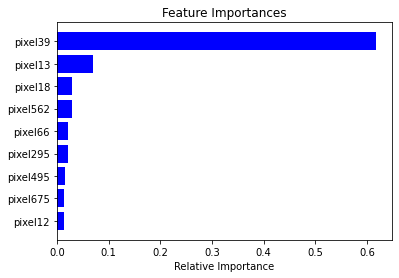

In [ ]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We see that 'pixel39' have the most importance. alternatively we can use ```SelectFromModel``` from ```sklearn.feature_selection``` which decides the importance with respect to their weight.

In [ ]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.label)

## Backward Feature Elimination
Backward Feature Elemination is a method to reduce the dimension by following some simple steps:
- Step - 1: First we take whole set from the training set and calculate its performance (say n variable).
- Step - 2: We now remove one of the variable (one at a time) (n-1 variables) and calculate its performance and compare it to the previous performance.
- Step - 3: We remove the variable which increases the performance on removal.

We continue removing variables one by one until it increase our criterion.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10) # Recursive Features Elimination
rfe = rfe.fit_transform(df, train.label)
print(rfe)
print(len(rfe))

[[ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  0  0]]
60000


## Forward Feature Selection
Forward Feature Selection is a method to reduce the dimension by following some simple steps:
- Step - 1: First we take empty set (containing 0 elements).
- Step - 2: We include one element to the empty set.
- Step - 3: We now include one of the variable (one at a time) (i+1 variables) and calculate its performance and compare it to the previous performance.
- Step - 4: We add the variable which increases the performance on addition.

We continue adding variables one by one until it increase our criterion.

In [ ]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.label) # inbuilt function for forward feature selection

We now calculate the dimension of the dataset after foeward selection.

In [ ]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])

len(variable)

137

We see that our dimension has been reduced to just 137 from 785.

## Singular Value Decomposition

SVD or Singual value decomposition is a dimensionality reduction technique which decomposes the maatrix created by the variables and features into three matrices smaller matrices. 

Say the matrix created by the dataset is $A$ which has order $n\times m$ where $n$ are the number of rows and $m$ are the number of columns can be decomposed into three matrices $U,\Sigma, V^T$ as shown below - 
\begin{align}A = U \Sigma V^T\end{align}
Here, 
- $U$ and $V$ are orthogonal matrices i.e. 
\begin{align} U^TU = V^TV = I \end{align}
- $\Sigma$ is a diagonal matrix containing the singular values of $X$, which can be positive, zero, or negative.

Suppose $A$ has $n$ rows and $m$ columns and $n ≥ m$. Then $U$ has a shape of $n \times n$,  $\Sigma$ has a shape of $n \times m$ and $V$ has shape $m \times m$.


In [ ]:
# svd data reduction in scikit-learn
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define matrix
A = df.to_numpy()
print("The original matrix:\n",A)
# create transform
svd = TruncatedSVD(n_components=3)
# fit transform
svd.fit(A)
# apply transform
result = svd.transform(A)
print("\nThe transformation:\n",result)

The original matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

The transformation:
 [[ 641.6104399   449.43246824   29.70024658]
 [ 491.51628674  360.8184735    37.64465041]
 [ 646.44026027  -43.79099063 -128.64580885]
 ...
 [ 569.2219505   136.36067956  -65.95225146]
 [ 635.78395804  317.16609831  105.29102372]
 [ 643.56708958  379.76168697  -15.36585435]]


## Principal Component Analysis
PCA or principal Component analysis is an unsupervised dimensionality reduction technique in which a principal component is a linear combination of the original variables. These Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset. Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component. Third principal component tries to explain the variance which is not explained by the first two principal components and so on.

It can be easily done by importing ```PCA``` from ```skklearn.decomposition``` and applying ```pca.fit()``` on the dataframe.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
transformed = pca.transform(df)
print(transformed.shape)
print(df.shape)

(60000, 155)
(60000, 155)


## Linear Discriminant Analysis
LDA or Linear Discriminant Analysis approach is very similar to a Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally finds the axes that maximize the separation between multiple classes. We can easily apply LDA by importing ```LinearDiscriminantAnalysis```from the library ```sklearn.discriminant_analysis``` and applying ```sklearn_lda.fit_transform()``` over the dataframe.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=3)
X_lda_sklearn = sklearn_lda.fit_transform(df, train.label)

X_lda_sklearn

array([[ 3.42316463, -0.3020493 , -1.47532769],
       [ 3.00098873, -1.15191416,  0.61084471],
       [-2.17240025,  1.01237014,  0.69845499],
       ...,
       [ 0.80144911,  0.48429027, -0.20946238],
       [ 2.59844678, -0.25391927,  0.80918358],
       [ 3.65872895, -0.11555439, -3.69790919]])

# **PART-B**

## Feature Extraction in Text
As we know that the machine learning algoriths need numbers to work with. As rax text is messy thats why machines can not work directly on the texts. So we convert or process th text into a format that machine can understand.
The process of conversion or the cleaning is called feature extraction in texts.

## Manual Tokenization
###Loadinig the data
We load the data using the ```open()``` function including its address and what we need to do with the file. Here we use ```'r+'``` which is read and write.

At last we close the file to save the changes in the file.

In [29]:
# load text
filename = 'pg13437.txt'
file = open(filename, 'r+')
base_text = file.read()
file.close()

### Spliting the data
Text file can be vey messy without a proper format. So to bring uniformity we use whitespaces to seperate the words from space, newlines, tabs, etc.

We can do this in Python with the ```split()``` function on the loaded string.

In [30]:
words = base_text.split()
print(words[:100])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories,', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.net', 'Title:', 'Best', 'Russian', 'Short', 'Stories', 'Author:', 'Various', 'Release', 'Date:', 'September', '11,', '2004', '[EBook', '#13437]', 'Last', 'Updated:', 'July', '27,', '2015', 'Language:', 'English', '***', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', '***', 'Produced', 'by', 'David', 'Starner,', 'Keith', 'M.', 'Eckrich,', 'and', 'the', 'Project', 'Gutenberg', 'Online']


Alternative approach is to use regex model (re) and split the document into words by selecting for strings of alphanumeric characters.
firstly we import ```re```

In [31]:
import re

Then we use the function ```re.split``` to split the data

In [32]:
words = re.split(r'\W+', base_text)
print(words[:100])

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', '11', '2004', 'EBook', '13437', 'Last', 'Updated', 'July', '27', '2015', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'M', 'Eckrich', 'and', 'the', 'Project']


### Split and Removal of punctuations
we want words without punctuations (like ',' , '.' ,  '$' ,etc) so we import punctuations from ```string``` and use ragex for character filtering. The function ```sub()``` replaces the punctuation with nothing.

In [33]:
import string

In [34]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', '11', '2004', 'EBook', '13437', 'Last', 'Updated', 'July', '27', '2015', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'M', 'Eckrich', 'and', 'the', 'Project']


### Normalizing case
We can normalize the case by calling ```lower()``` function to each word.

In [39]:
words = [word.lower() for word in words]
print(words[:100])

['', 'the', 'project', 'gutenberg', 'ebook', 'of', 'best', 'russian', 'short', 'stories', 'by', 'various', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'title', 'best', 'russian', 'short', 'stories', 'author', 'various', 'release', 'date', 'september', '11', '2004', 'ebook', '13437', 'last', 'updated', 'july', '27', '2015', 'language', 'english', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories', 'produced', 'by', 'david', 'starner', 'keith', 'm', 'eckrich', 'and', 'the', 'project']


## Tokenization and Cleaning with NLTK
The Natural Language Toolkit, or NLTK for short, is a Python library written for working and modeling text. We import the ```nltk``` library and download ```punkt``` and ```stopwords``` which contais the puunctuations and the stopwords

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Spliting into the Sentences
NLTK provides the ```sent_tokenize()``` function to split text into sentences. It will split paragraphs into the sentences.

In [43]:
from nltk import sent_tokenize

# load data
filename = 'pg13437.txt'
file = open(filename, 'r+')
base_text = file.read()
file.close()
# split into sentences
sentences = sent_tokenize(base_text)
print(sentences[0])

﻿The Project Gutenberg EBook of Best Russian Short Stories, by Various

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.


### Split into Words
NLTK provides a function called ```word_tokenize()``` for splitting strings into tokens and we normalize the case for every word

In [51]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(base_text)
# convert to lower case
tokens = [w.lower() for w in tokens]
print(tokens[:100])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'best', 'russian', 'short', 'stories', ',', 'by', 'various', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'you', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.net', 'title', ':', 'best', 'russian', 'short', 'stories', 'author', ':', 'various', 'release', 'date', ':', 'september', '11', ',', '2004', '[', 'ebook', '#', '13437', ']', 'last', 'updated', ':', 'july', '27', ',', '2015', 'language', ':', 'english', '***', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories']


### Filtering out the punctuations

In [52]:
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['project', 'gutenberg', 'ebook', 'of', 'best', 'russian', 'short', 'stories', 'by', 'various', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'title', 'best', 'russian', 'short', 'stories', 'author', 'various', 'release', 'date', 'september', 'ebook', 'last', 'updated', 'july', 'language', 'english', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories', 'produced', 'by', 'david', 'starner', 'keith', 'eckrich', 'and', 'the', 'project', 'gutenberg', 'online', 'distributed', 'proofreaders', 'team', 'illustration', 'anton', 'chekhov', 'russia', 'greatest', 'writer', 'best', 'russian']


### Filter out Stop Words (and Pipeline)

Stop words are those words that do not contribute to the deeper meaning of the phrase.

They are the most common words such as: the, a, and is. 

In [53]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

we can see that all of them are lower case.

In [54]:
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories', 'various', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'title', 'best', 'russian', 'short', 'stories', 'author', 'various', 'release', 'date', 'september', 'ebook', 'last', 'updated', 'july', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories', 'produced', 'david', 'starner', 'keith', 'eckrich', 'project', 'gutenberg', 'online', 'distributed', 'proofreaders', 'team', 'illustration', 'anton', 'chekhov', 'russia', 'greatest', 'writer', 'best', 'russian', 'short', 'stories', 'compiled', 'edited', 'thomas', 'seltzer', 'contents', 'introduction', 'queen', 'spades', 'cloak', 'district', 'doctor', 'christmas', 'tree', 'wedding', 'god', 'sees', 'truth', 'waits', 'muzhik', 'fed', 'two', 'officials', 'shades', 'phantasy', 'signa

We can see that above text is tokenized and is in lowercase

### Stem Words
Words like 'Finding' , 'found' , 'finds' , etc all reduces to stem 'find'.

We can easily filter stem words by using NLTK via the ```PorterStemmer``` class.

In [60]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# split into words
tokens = word_tokenize(base_text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[:100])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'best', 'russian', 'short', 'stori', ',', 'by', 'variou', 'thi', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyon', 'anywher', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrict', 'whatsoev', '.', 'you', 'may', 'copi', 'it', ',', 'give', 'it', 'away', 'or', 're-us', 'it', 'under', 'the', 'term', 'of', 'the', 'project', 'gutenberg', 'licens', 'includ', 'with', 'thi', 'ebook', 'or', 'onlin', 'at', 'www.gutenberg.net', 'titl', ':', 'best', 'russian', 'short', 'stori', 'author', ':', 'variou', 'releas', 'date', ':', 'septemb', '11', ',', '2004', '[', 'ebook', '#', '13437', ']', 'last', 'updat', ':', 'juli', '27', ',', '2015', 'languag', ':', 'english', '***', 'start', 'OF', 'thi', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stori']


## Word Counts with CountVectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:
- Create an instance of the CountVectorizer class.
- Call the fit() function in order to learn a vocabulary from one or more documents.
- Call the transform() function on one or more documents as needed to encode each as a vector.

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. Because these vectors will contain a lot of zeros, we call them sparse. 

Python provides an efficient way of handling sparse vectors in the `scipy.sparse` package. 

The vectors returned from a call to `transform()` will be sparse vectors, and you can transform them back to NumPy arrays to look and better understand what is going on by calling the `toarray()` function.



In [58]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = sentences
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 8170, 'project': 6243, 'gutenberg': 3742, 'ebook': 2628, 'of': 5518, 'best': 880, 'russian': 6921, 'short': 7267, 'stories': 7785, 'by': 1179, 'various': 8709, 'this': 8213, 'is': 4430, 'for': 3303, 'use': 8660, 'anyone': 445, 'anywhere': 449, 'at': 618, 'no': 5406, 'cost': 1815, 'and': 396, 'with': 9073, 'almost': 344, 'restrictions': 6735, 'whatsoever': 8969, 'you': 9184, 'may': 5013, 'copy': 1790, 'it': 4438, 'give': 3550, 'away': 690, 'or': 5588, 're': 6461, 'under': 8532, 'terms': 8148, 'license': 4739, 'included': 4195, 'online': 5562, 'www': 9159, 'net': 5371, 'title': 8293, 'author': 666, 'release': 6599, 'date': 2030, 'september': 7143, '11': 2, '2004': 19, '13437': 5, 'last': 4655, 'updated': 8647, 'july': 4512, '27': 22, '2015': 20, 'language': 4641, 'english': 2771, 'start': 7705, 'produced': 6222, 'david': 2033, 'starner': 7702, 'keith': 4537, 'eckrich': 2632, 'distributed': 2410, 'proofreaders': 6260, 'team': 8108, 'illustration': 4108, 'anton': 438, 'chekhov': 13

Above, We can see that what's tokanized using the ```vectorizer.vocabulary_```

In [59]:
print(vectorizer.vocabulary_)

{'the': 8170, 'project': 6243, 'gutenberg': 3742, 'ebook': 2628, 'of': 5518, 'best': 880, 'russian': 6921, 'short': 7267, 'stories': 7785, 'by': 1179, 'various': 8709, 'this': 8213, 'is': 4430, 'for': 3303, 'use': 8660, 'anyone': 445, 'anywhere': 449, 'at': 618, 'no': 5406, 'cost': 1815, 'and': 396, 'with': 9073, 'almost': 344, 'restrictions': 6735, 'whatsoever': 8969, 'you': 9184, 'may': 5013, 'copy': 1790, 'it': 4438, 'give': 3550, 'away': 690, 'or': 5588, 're': 6461, 'under': 8532, 'terms': 8148, 'license': 4739, 'included': 4195, 'online': 5562, 'www': 9159, 'net': 5371, 'title': 8293, 'author': 666, 'release': 6599, 'date': 2030, 'september': 7143, '11': 2, '2004': 19, '13437': 5, 'last': 4655, 'updated': 8647, 'july': 4512, '27': 22, '2015': 20, 'language': 4641, 'english': 2771, 'start': 7705, 'produced': 6222, 'david': 2033, 'starner': 7702, 'keith': 4537, 'eckrich': 2632, 'distributed': 2410, 'proofreaders': 6260, 'team': 8108, 'illustration': 4108, 'anton': 438, 'chekhov': 13

We can see that all words are normalized to lowercase by default and  punctuation was ignored.

We can deirectly use the encoded vector into ML algorithms

## TF(Term Frequency) - IDF(Inverse Document Frequency)
TF or Term Frequency may can be defined as a measure of how frequently a term occurs in a document.

__Formula__
>TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

IDF or Inverse Document Frequency may can be defined as a measure of how important a term is.

__Formula__
>IDF(t) = $log_e$(Total number of documents / Number of documents with term t in it)

## Word Frequencies with TfidfVectorizer
Words like 'The' will appear many times nd their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most
popular method is called TF-IDF. This is an abriviation that stands for **Term Frequency - Inverse
Document Frequency** which are the components of the resulting scores assigned to each word.
- __Term Frequency__- This summarizes how often a given word appears within a document.
- __Inverse Document Frequency__- This downscales words that appear a lot across documents.

The ```TfidfVectorizer``` will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. 

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = sentences
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 8170, 'project': 6243, 'gutenberg': 3742, 'ebook': 2628, 'of': 5518, 'best': 880, 'russian': 6921, 'short': 7267, 'stories': 7785, 'by': 1179, 'various': 8709, 'this': 8213, 'is': 4430, 'for': 3303, 'use': 8660, 'anyone': 445, 'anywhere': 449, 'at': 618, 'no': 5406, 'cost': 1815, 'and': 396, 'with': 9073, 'almost': 344, 'restrictions': 6735, 'whatsoever': 8969, 'you': 9184, 'may': 5013, 'copy': 1790, 'it': 4438, 'give': 3550, 'away': 690, 'or': 5588, 're': 6461, 'under': 8532, 'terms': 8148, 'license': 4739, 'included': 4195, 'online': 5562, 'www': 9159, 'net': 5371, 'title': 8293, 'author': 666, 'release': 6599, 'date': 2030, 'september': 7143, '11': 2, '2004': 19, '13437': 5, 'last': 4655, 'updated': 8647, 'july': 4512, '27': 22, '2015': 20, 'language': 4641, 'english': 2771, 'start': 7705, 'produced': 6222, 'david': 2033, 'starner': 7702, 'keith': 4537, 'eckrich': 2632, 'distributed': 2410, 'proofreaders': 6260, 'team': 8108, 'illustration': 4108, 'anton': 438, 'chekhov': 13

## The Bag-of-Word Model
The Bag of Words (BoW) model is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).

Let’s take three types of movie reviews we saw earlier:

>Review 1: This movie is very scary and long

>Review 2: This movie is not scary and is slow

>Review 3: This movie is spooky and good

We will first build a vocabulary from all the unique words in the above three reviews. 

The vocabulary consists of these 11 words: 

‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’,  ‘slow’, ‘spooky’,  ‘good’.

We can now take each of these words and mark their occurrence in the three movie reviews above with 1s and 0s. This will give us 3 vectors for 3 reviews:

>Vector of Review 1: [1 1 1 1 1 1 1 0 0 0 0]

>Vector of Review 2: [1 1 2 0 0 1 1 0 1 0 0]

>Vector of Review 3: [1 1 1 0 0 0 1 0 0 1 1]

#### Drawbacks of using a Bag-of-Words (BoW) Model:
In the above example, we can have vectors of length 11. However, we start facing issues when we come across new sentences:

1. If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too.
2. Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what we would like to avoid)
3. We are retaining no information on the grammar of the sentences nor on the ordering of the words in the text.